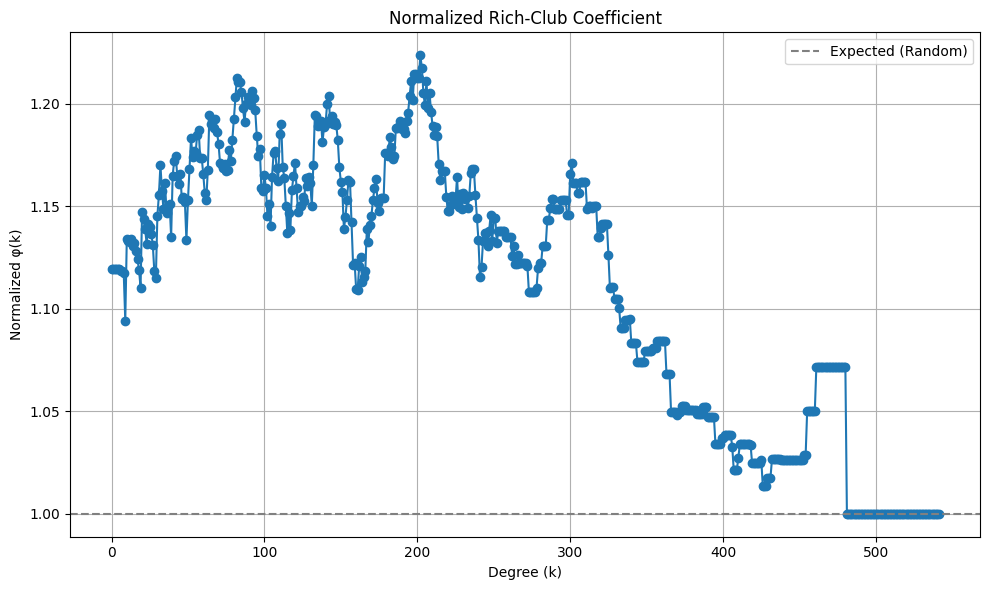

In [ ]:
!pip install networkx

# Import necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the institution collaboration data
df = pd.read_csv("Institution Collabs.csv")

# Create an undirected graph where nodes are institutions and edges represent co-authorships
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["Source"], row["Target"], weight=row["Weight"])

# Compute the rich-club coefficient for the real graph (unnormalized)
phi_real = nx.rich_club_coefficient(G, normalized=False)

# Generate a randomized version of the graph with the same degree sequence
# This acts as the null model for normalization
G_random = nx.configuration_model([d for n, d in G.degree()])  # Generate configuration model
G_random = nx.Graph(G_random)  # Convert to simple graph (removes parallel edges)
G_random.remove_edges_from(nx.selfloop_edges(G_random))  # Remove self-loops

# Compute the rich-club coefficient for the randomized graph
phi_random = nx.rich_club_coefficient(G_random, normalized=False)

# Normalize the rich-club coefficient: φ_norm(k) = φ_real(k) / φ_random(k)
phi_norm = {}
for k in phi_real:
    if k in phi_random and phi_random[k] != 0:
        phi_norm[k] = phi_real[k] / phi_random[k]

# Plot the normalized rich-club coefficient
plt.figure(figsize=(10, 6))
plt.plot(list(phi_norm.keys()), list(phi_norm.values()), marker='o')
plt.axhline(y=1, color='gray', linestyle='--', label="Expected (Random)")
plt.title("Normalized Rich-Club Coefficient")
plt.xlabel("Degree (k)")
plt.ylabel("Normalized φ(k)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
